### Retenção de Recursos Humanos
<i> - Estudo para identificar quais colaboradores tem maior probabilidade de deixar o emprego
***
Análise exploratória de dados


In [45]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
file_name = "https://raw.githubusercontent.com/rajeevratan84/datascienceforbusiness/master/hr_data.csv"
df_data = pd.read_csv(file_name)

file_name = "https://raw.githubusercontent.com/rajeevratan84/datascienceforbusiness/master/employee_satisfaction_evaluation.xlsx"
satis_lvl = pd.read_excel(file_name)

In [7]:
df_data.head()

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,1003,2,157,3,0,1,0,sales,low
1,1005,5,262,6,0,1,0,sales,medium
2,1486,7,272,4,0,1,0,sales,medium
3,1038,5,223,5,0,1,0,sales,low
4,1057,2,159,3,0,1,0,sales,low


In [8]:
df_data.tail()

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
14994,87670,2,151,3,0,1,0,support,low
14995,87673,2,160,3,0,1,0,support,low
14996,87679,2,143,3,0,1,0,support,low
14997,87681,6,280,4,0,1,0,support,low
14998,87684,2,158,3,0,1,0,support,low


In [9]:
satis_lvl.head()

,EMPLOYEE #,satisfaction_level,last_evaluation
0,1003,0.38,0.53
1,1005,0.80,0.86
2,1486,0.11,0.88
3,1038,0.72,0.87
4,1057,0.37,0.52


In [5]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 9 columns):
employee_id              14999 non-null int64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
department               14999 non-null object
salary                   14999 non-null object
dtypes: int64(7), object(2)
memory usage: 1.0+ MB


***
Juntando tabelas

In [51]:
tabela = df_data.set_index('employee_id').join(satis_lvl.set_index('EMPLOYEE #'))
tabela = tabela.reset_index()
tabela.head()

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,satisfaction_level,last_evaluation
0,1003,2,157,3,0,1,0,sales,low,0.38,0.53
1,1005,5,262,6,0,1,0,sales,medium,0.80,0.86
2,1486,7,272,4,0,1,0,sales,medium,0.11,0.88
3,1038,5,223,5,0,1,0,sales,low,0.72,0.87
4,1057,2,159,3,0,1,0,sales,low,0.37,0.52


- Linhas que apresentam valores nulos em celulas

In [52]:
np.shape(tabela)
tabela[tabela.isnull().any(axis=1)]

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,satisfaction_level,last_evaluation
18,3794,2,160,3,1,1,1,sales,low,NaN,NaN
19,1140,5,262,5,0,1,0,sales,low,NaN,0.89
33,1230,2,140,3,0,1,0,hr,low,NaN,NaN
53,1340,2,132,3,0,1,0,support,low,NaN,NaN
72,22316,2,149,3,0,1,0,product_mng,high,NaN,NaN
92,1581,2,143,3,0,1,0,sales,low,NaN,NaN
107,17376,2,148,3,0,1,0,accounting,medium,NaN,NaN
120,1739,4,158,4,1,1,0,technical,low,NaN,NaN
137,1847,2,129,3,0,1,0,management,low,NaN,NaN
175,32923,4,164,2,0,1,0,sales,low,NaN,NaN


Adiciona média da coluna em células que estão vazias

In [53]:
tabela.fillna(tabela.mean(), inplace=True)

***
Contagem de quantos empregados existem em cada área

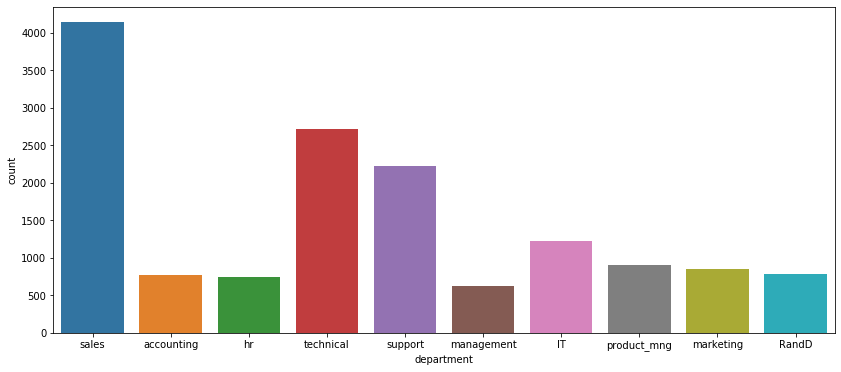

In [23]:
plt.figure(figsize=(14, 6))
sns.countplot(x = df_data.department, data=df_data)
plt.show()

***
Média para cada item relacionados com os departamentos

In [47]:
departaments = df_data.groupby('department')
media = departaments.mean()
media

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
department,,,,,,,
IT,45920.887531,3.816626,202.215974,3.468623,0.133659,0.222494,0.002445
RandD,41865.524778,3.853875,200.800508,3.367217,0.170267,0.153748,0.034307
accounting,44946.953064,3.825293,201.162973,3.522816,0.125163,0.265971,0.018253
hr,42848.071719,3.654939,198.684709,3.355886,0.120433,0.290934,0.020298
management,53328.726984,3.860317,201.249206,4.303175,0.163492,0.144444,0.109524
marketing,47454.285548,3.687646,199.385781,3.569930,0.160839,0.236597,0.050117
product_mng,48799.177384,3.807095,199.965632,3.475610,0.146341,0.219512,0.000000
sales,46394.321256,3.776329,200.911353,3.534058,0.141787,0.244928,0.024155
support,43909.381337,3.803948,200.758188,3.393001,0.154778,0.248991,0.008973


***
Histograma do nível de satisfação dos empregados

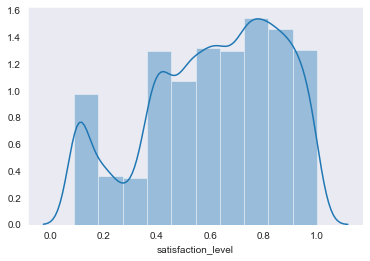

In [57]:
sns.set_style("dark")
sns.distplot(tabela.satisfaction_level, bins=10)
plt.show()

***
Evasão de empregados por categoria de salário

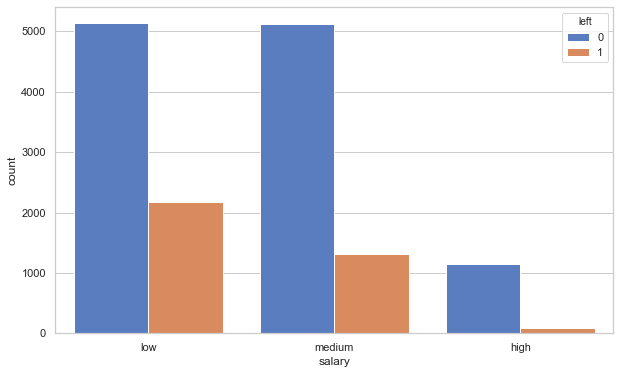

In [68]:
plt.figure(figsize=(10,6))
sns.set(style="whitegrid")

# Draw a nested barplot to show survival for class and sex
g = sns.countplot(x="salary", hue="left", data=tabela, palette="muted")

***
Evasão de empregados por departamento

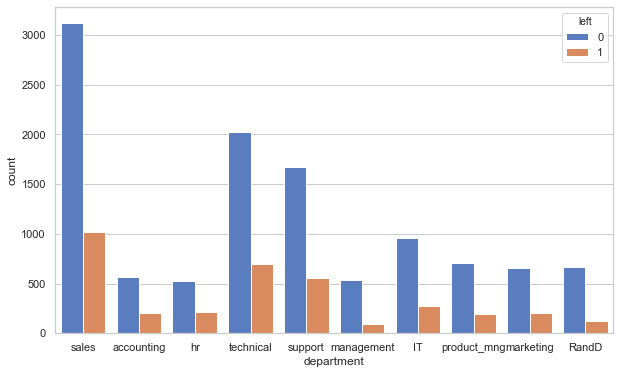

In [81]:
plt.figure(figsize=(10,6))
g = sns.countplot(x="department", hue="left", data=tabela, palette="muted")

*** 
Correlação entre os parâmetros

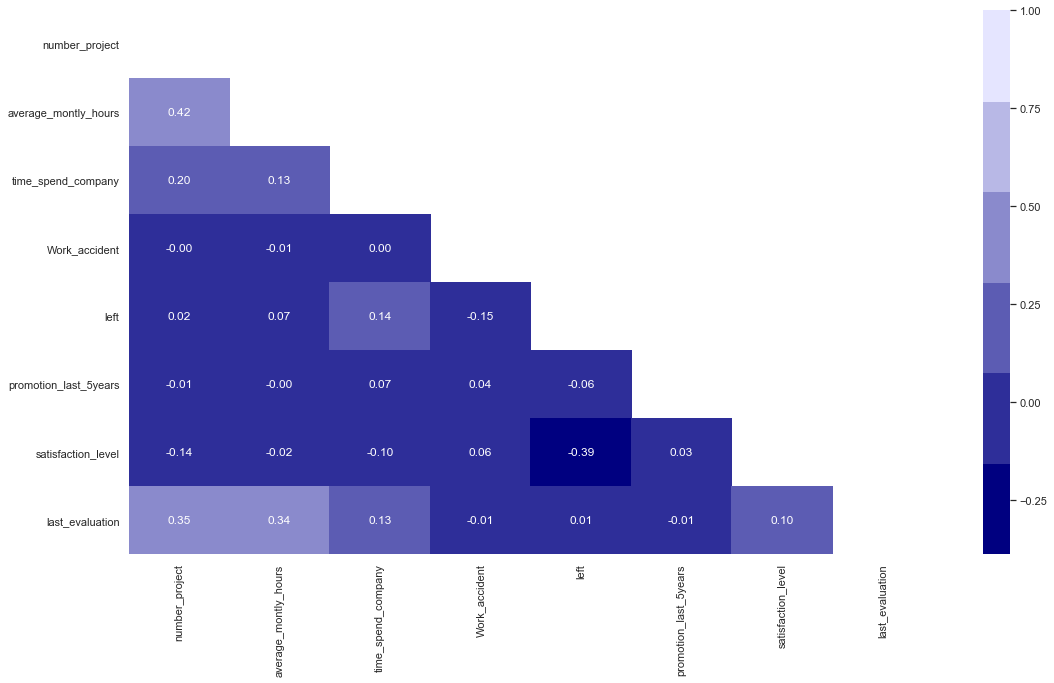

In [90]:
#tabela = tabela.drop(columns='employee_id')

columns =['department', 'salary']
tabelacorr =  tabela.drop(columns=columns)
corr = tabelacorr.corr()
# Heatmap
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(18, 10))

# Generate a custom diverging colormap

sns.heatmap(corr, mask=mask, annot = True, fmt = '.2f', cmap=sns.light_palette("navy", reverse=True))

plt.show()


<Figure size 2160x2160 with 0 Axes>

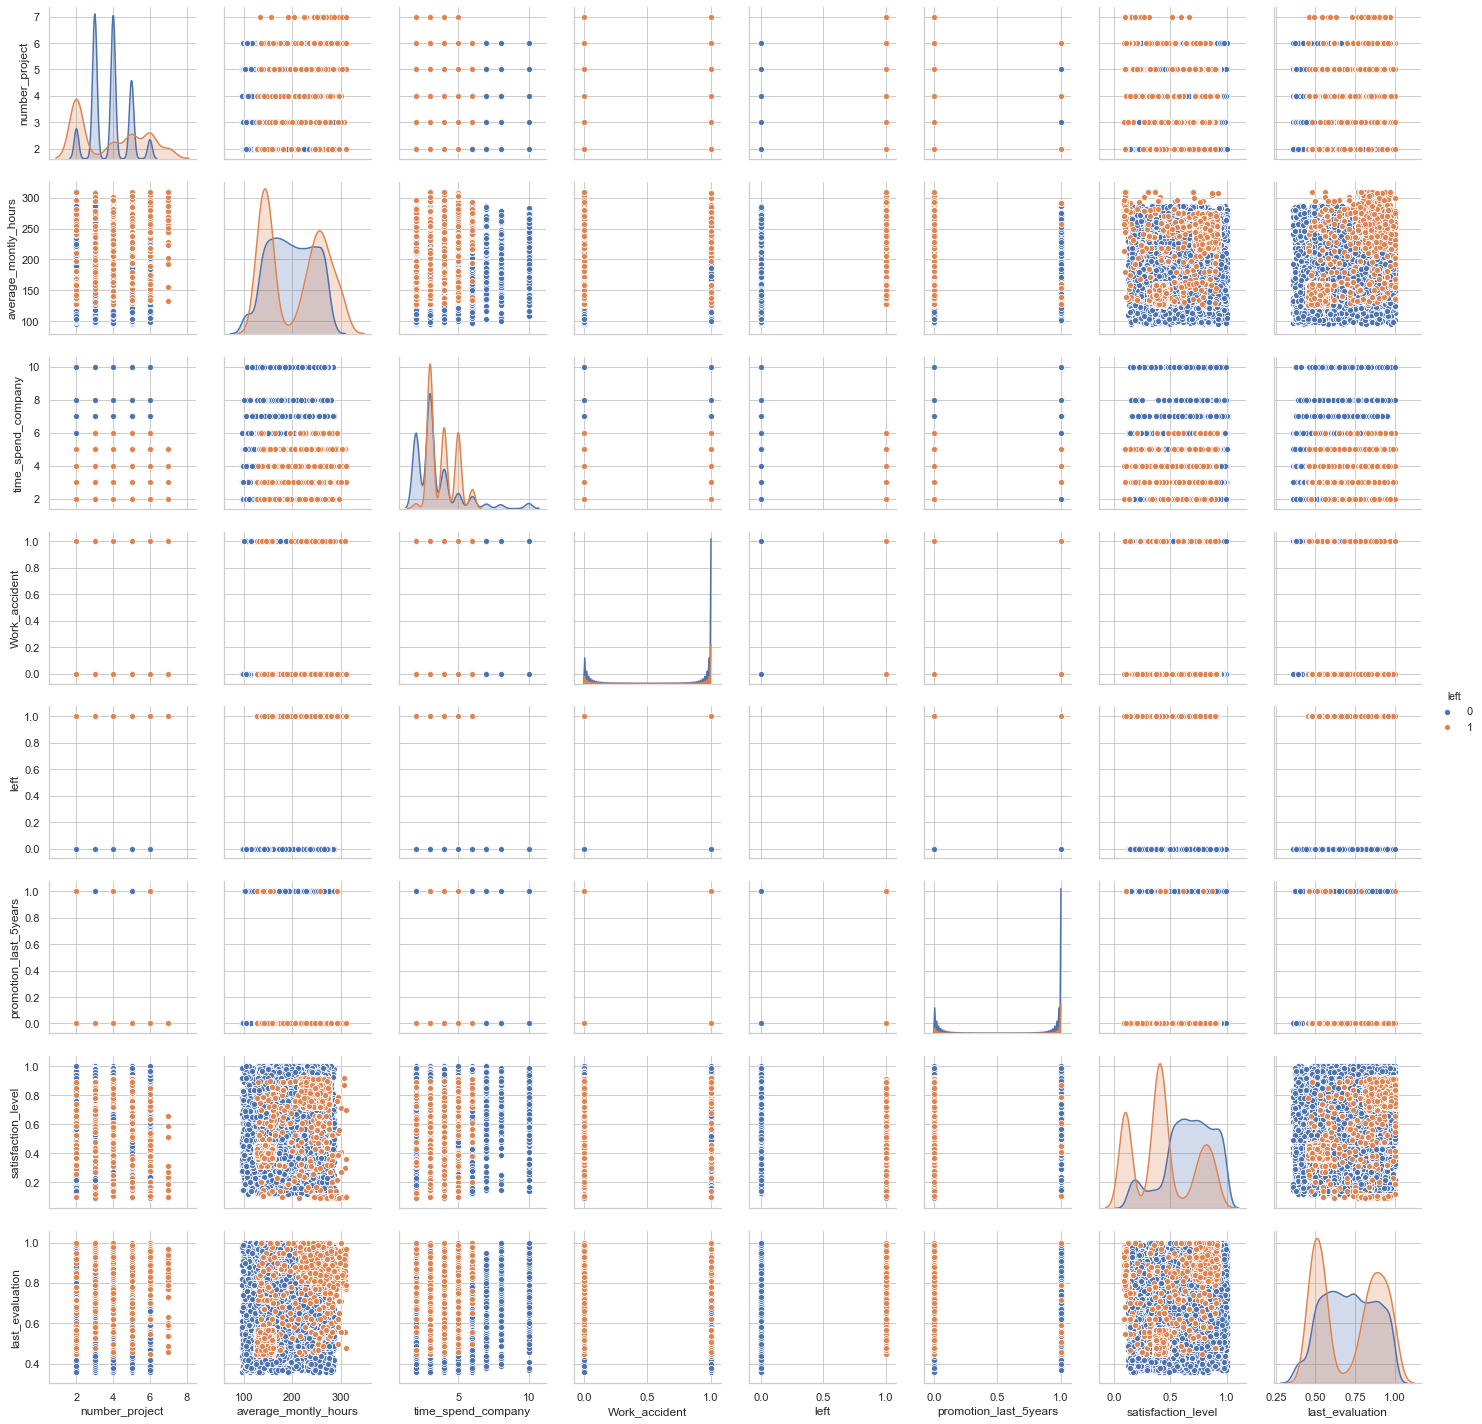

In [95]:
plt.figure(figsize=(30,30))
g = sns.pairplot(tabelacorr, hue='left')

### Preparando dados categóricos para Modelos de Machine Learning

In [96]:
categorial = ['department','salary']
df_final = pd.get_dummies(tabela, columns=categorial, drop_first=True)
df_final.head()

,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,satisfaction_level,last_evaluation,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_low,salary_medium
0,2,157,3,0,1,0,0.38,0.53,0,0,0,0,0,0,1,0,0,1,0
1,5,262,6,0,1,0,0.80,0.86,0,0,0,0,0,0,1,0,0,0,1
2,7,272,4,0,1,0,0.11,0.88,0,0,0,0,0,0,1,0,0,0,1
3,5,223,5,0,1,0,0.72,0.87,0,0,0,0,0,0,1,0,0,1,0
4,2,159,3,0,1,0,0.37,0.52,0,0,0,0,0,0,1,0,0,1,0


Separando parâmetros de entrada e de saída

In [98]:
from sklearn.model_selection import train_test_split

X = df_final.drop(['left'],axis=1).values
y = df_final['left'].values

# Separando entre dados de treino e de teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

Normalizando os dados

In [99]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [100]:
df_train = pd.DataFrame(X_train)
df_train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,-0.650367,0.979655,-0.335037,2.438930,-0.144933,1.320172,1.133697,-0.235347,-0.230116,-0.231033,4.844914,-0.243573,-0.256054,-0.618056,-0.416650,-0.467944,1.026350,-0.870146
1,0.976170,1.379374,-0.335037,2.438930,-0.144933,1.441349,0.198232,-0.235347,-0.230116,-0.231033,-0.206402,-0.243573,-0.256054,1.617977,-0.416650,-0.467944,-0.974327,1.149232
2,-0.650367,0.160229,-0.335037,-0.410016,-0.144933,1.481741,1.484496,-0.235347,-0.230116,-0.231033,-0.206402,-0.243573,-0.256054,-0.618056,2.400097,-0.467944,1.026350,-0.870146
3,2.602708,-1.358707,1.030738,-0.410016,-0.144933,-1.224534,0.724431,-0.235347,-0.230116,-0.231033,-0.206402,-0.243573,-0.256054,-0.618056,-0.416650,2.137009,1.026350,-0.870146
4,-1.463636,-1.038931,-0.335037,-0.410016,-0.144933,-0.982181,-1.555766,-0.235347,-0.230116,-0.231033,-0.206402,-0.243573,-0.256054,1.617977,-0.416650,-0.467944,1.026350,-0.870146


Regressão Logística

In [101]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

model = LogisticRegression(solver='lbfgs')
model.fit(X_train, y_train)

predictions = model.predict(X_test)

print("Accuracy {0:.2f}%".format(100*accuracy_score(predictions, y_test)))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

Accuracy 78.93%
[[3166  250]
 [ 698  386]]
              precision    recall  f1-score   support

           0       0.82      0.93      0.87      3416
           1       0.61      0.36      0.45      1084

    accuracy                           0.79      4500
   macro avg       0.71      0.64      0.66      4500
weighted avg       0.77      0.79      0.77      4500



Random Florest Classifier

In [102]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

model = RandomForestClassifier()
model.fit(X_train, y_train)

predictions = model.predict(X_test)
score = model.score(X_test, y_test)

print("Accuracy {0:.2f}%".format(100*accuracy_score(predictions, y_test)))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

C:\Users\Safira\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Accuracy 98.78%
[[3402   14]
 [  41 1043]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      3416
           1       0.99      0.96      0.97      1084

    accuracy                           0.99      4500
   macro avg       0.99      0.98      0.98      4500
weighted avg       0.99      0.99      0.99      4500



Features mais importantes

In [103]:
feature_importances = pd.DataFrame(model.feature_importances_,
                                   index = pd.DataFrame(X_train).columns,
                                    columns=['importance']).sort_values('importance',ascending=False)

feature_importances

,importance
5,0.327114
0,0.199049
2,0.192961
1,0.134402
6,0.110447
3,0.007245
16,0.005275
15,0.004089
13,0.003732
17,0.003381


### Deep Learning

In [108]:
import tensorflow as tf
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

Testando uma Rede Neural rasa

In [105]:
model = Sequential()

model.add(Dense(9, kernel_initializer = "uniform", activation = "relu", input_dim=18))
model.add(Dense(1, kernel_initializer = "uniform", activation = "sigmoid"))

model.compile(optimizer= "adam",loss = "binary_crossentropy",metrics = ["accuracy"])

W0112 20:57:46.472482 11664 deprecation.py:506] From C:\Users\Safira\Anaconda3\lib\site-packages\tensorflow\python\keras\initializers.py:119: calling RandomUniform.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0112 20:57:55.257010 11664 deprecation.py:323] From C:\Users\Safira\Anaconda3\lib\site-packages\tensorflow\python\ops\nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Nosso primeiro modelo apreseta 18 entradas, uma camada escondida com 9 neurônios, e apenas um neurônio de saída (classificação binária).

In [107]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 9)                 171       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 10        
Total params: 181
Trainable params: 181
Non-trainable params: 0
_________________________________________________________________


Treinando o modelo por 25 épocas

In [110]:
batch_size = 10
epochs = 25

history = model.fit(X_train,
                    y_train,
                    batch_size = batch_size,
                    epochs = epochs,
                    verbose = 1,
                    validation_data = (X_test, y_test))

score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 10499 samples, validate on 4500 samples
Epoch 1/25
10499/10499 [==============================] - 8s 722us/sample - loss: 0.4269 - acc: 0.7946 - val_loss: 0.3171 - val_acc: 0.8282
Epoch 2/25
10499/10499 [==============================] - 4s 370us/sample - loss: 0.2816 - acc: 0.8477 - val_loss: 0.2663 - val_acc: 0.8909
Epoch 3/25
10499/10499 [==============================] - 4s 428us/sample - loss: 0.2417 - acc: 0.9248 - val_loss: 0.2382 - val_acc: 0.9249
Epoch 4/25
10499/10499 [==============================] - 4s 387us/sample - loss: 0.2196 - acc: 0.9420 - val_loss: 0.2180 - val_acc: 0.9436
Epoch 5/25
10499/10499 [==============================] - 4s 346us/sample - loss: 0.2046 - acc: 0.9469 - val_loss: 0.2043 - val_acc: 0.9480
Epoch 6/25
10499/10499 [==============================] - 4s 340us/sample - loss: 0.1934 - acc: 0.9498 - val_loss: 0.1942 - val_acc: 0.9511
Epoch 7/25
10499/10499 [==============================] - 4s 354us/sample - loss: 0.1853 - acc: 0.9525 - val_lo

Agora iremos plotar os gráficos de Loss e de Accuracy no decorrer das épocas

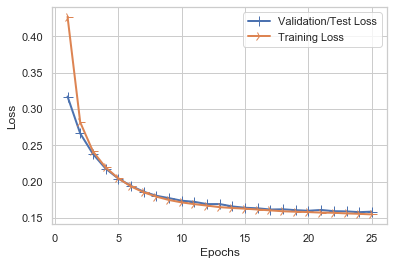

In [116]:
import matplotlib.pyplot as plt

history_dict = history.history

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)

line1 = plt.plot(epochs, val_loss_values, label='Validation/Test Loss')
line2 = plt.plot(epochs, loss_values, label='Training Loss')
plt.setp(line1, linewidth=2.0, marker = '+', markersize=10.0)
plt.setp(line2, linewidth=2.0, marker = '4', markersize=10.0)
plt.xlabel('Epochs') 
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()

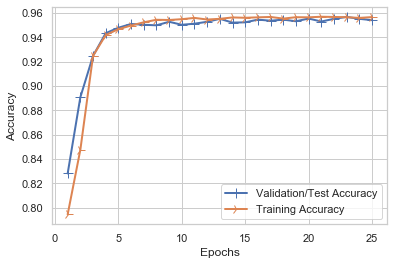

In [118]:
import matplotlib.pyplot as plt

history_dict = history.history

acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']
epochs = range(1, len(loss_values) + 1)

line1 = plt.plot(epochs, val_acc_values, label='Validation/Test Accuracy')
line2 = plt.plot(epochs, acc_values, label='Training Accuracy')
plt.setp(line1, linewidth=2.0, marker = '+', markersize=10.0)
plt.setp(line2, linewidth=2.0, marker = '4', markersize=10.0)
plt.xlabel('Epochs') 
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()
plt.show()

Métricas de performance do modelo

In [119]:
predictions = model.predict(X_test)
predictions = (predictions > 0.5)

print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

[[3315  101]
 [ 105  979]]
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      3416
           1       0.91      0.90      0.90      1084

    accuracy                           0.95      4500
   macro avg       0.94      0.94      0.94      4500
weighted avg       0.95      0.95      0.95      4500



Testando um modelo mais profundo

In [120]:
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import Dropout

model2 = Sequential()

# Hidden Layer 1
model2.add(Dense(270, activation='relu', input_dim=18, kernel_regularizer=l2(0.01)))
model2.add(Dropout(0.3, noise_shape=None, seed=None))

# Hidden Layer 1
model2.add(Dense(180, activation='relu', kernel_regularizer=l2(0.01)))
model2.add(Dropout(0.3, noise_shape=None, seed=None))

# Hidden Layer 2
model2.add(Dense(90, activation = 'relu', kernel_regularizer=l2(0.01)))
model.add(Dropout(0.3, noise_shape=None, seed=None))

model2.add(Dense(1, activation='sigmoid'))

model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model2.summary()

W0112 21:56:54.368038 11664 deprecation.py:506] From C:\Users\Safira\Anaconda3\lib\site-packages\tensorflow\python\ops\init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 270)               5130      
_________________________________________________________________
dropout (Dropout)            (None, 270)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 180)               48780     
_________________________________________________________________
dropout_1 (Dropout)          (None, 180)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 90)                16290     
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 91        
Total params: 70,291
Trainable params: 70,291
Non-trainable params: 0
__________________________________________________

In [121]:
batch_size = 10
epochs = 25

history = model2.fit(X_train,
                    y_train,
                    batch_size = batch_size,
                    epochs = epochs,
                    verbose = 1,
                    validation_data = (X_test, y_test))

score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 10499 samples, validate on 4500 samples
Epoch 1/25
10499/10499 [==============================] - 5s 523us/sample - loss: 0.6399 - acc: 0.9065 - val_loss: 0.2791 - val_acc: 0.9460
Epoch 2/25
10499/10499 [==============================] - 4s 405us/sample - loss: 0.2776 - acc: 0.9397 - val_loss: 0.2580 - val_acc: 0.9487
Epoch 3/25
10499/10499 [==============================] - 4s 399us/sample - loss: 0.2611 - acc: 0.9417 - val_loss: 0.2449 - val_acc: 0.9476
Epoch 4/25
10499/10499 [==============================] - 4s 402us/sample - loss: 0.2513 - acc: 0.9431 - val_loss: 0.2623 - val_acc: 0.9429
Epoch 5/25
10499/10499 [==============================] - 4s 400us/sample - loss: 0.2488 - acc: 0.9451 - val_loss: 0.2326 - val_acc: 0.9496
Epoch 6/25
10499/10499 [==============================] - 4s 392us/sample - loss: 0.2442 - acc: 0.9446 - val_loss: 0.2367 - val_acc: 0.9442
Epoch 7/25
10499/10499 [==============================] - 4s 400us/sample - loss: 0.2401 - acc: 0.9466 - val_lo

Relatório de Performance do modelo

In [122]:
predictions = model2.predict(X_test)
predictions = (predictions > 0.5)

print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

[[3335   81]
 [ 113  971]]
              precision    recall  f1-score   support

           0       0.97      0.98      0.97      3416
           1       0.92      0.90      0.91      1084

    accuracy                           0.96      4500
   macro avg       0.95      0.94      0.94      4500
weighted avg       0.96      0.96      0.96      4500



<i> Mesmo utilizando uma rede neural mais profunda, não consiguimos obter um valor de Acurácia maior que 0.95.
    Com isso podemos observar que para esse dataset, o modelo que utilizaou Random Florest se mostrou mais eficiente.